### OLA - Ensemble Learning

**Problem Statement :**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

In [ ]:
# import required basic library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/ola_driver_scaler.csv")
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


EXPLORATORY DATA ANALYSIS

In [ ]:
print('Rows in the ola dataset: ',data.shape[0])
print('Columns in the ola dataset: ',data.shape[1])

Rows in the ola dataset:  19104
Columns in the ola dataset:  14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


Column Profiling:


* MMMM-YY : Reporting Date (Monthly) (date-time)
* Age : Age of the employee (numerical)
* Gender : Gender of the employee – Male : 0, Female: 1 (categorical)
* City : City Code of the employee (categorical)
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate (categorical)
* Income : Monthly average Income of the employee (numerical)
* Date Of Joining : Joining date for the employee (date-time)
* LastWorkingDate : Last date of working for the employee - Target Feature (date-time, but will be converted to categorical)
* Joining Designation : Designation of the employee at the time of joining (categorical, ordinal)
* Grade : Grade of the employee at the time of reporting (categorical, ordinal)
* Total Business Value : The total business value acquired by the employee in a month (negative business indicates cancellation/refund or car EMI adjustments) (numerical)
* Quarterly Rating : Quarterly rating of the employee: 1,2,3,4,5 (categorical, ordinal - higher is better)

In [ ]:
# Checking null value
data.isnull()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,False,False,False,False,False,False,False,False,False,True,False,False,False,False
19100,False,False,False,False,False,False,False,False,False,True,False,False,False,False
19101,False,False,False,False,False,False,False,False,False,True,False,False,False,False
19102,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
# check for missing values
data.isnull().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


In [ ]:
# Describing the data also know as 5 point summary
# Giving Statical information about data
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
data.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
data.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.nunique()

,0
MMM-YY,24
Driver_ID,2381
Age,36
Gender,2
City,29
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,493
Joining Designation,5


In [ ]:
data.isna().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


DATA PROCESSING AND FEATURE ENGINEERING

In [ ]:
data1 = data.copy(deep=True)

In [ ]:
# # Target variable creation: Create a column called target which tells whether the driver has left the company-
# # driver whose last working day is present will have the value 1

first =  (data1.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
first.rename(columns={'LastWorkingDate':'target'},inplace=True)
first.head()

<ipython-input-13-46c49b490ce3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
<ipython-input-13-46c49b490ce3>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  first['LastWorkingDate'].replace({True:1,False:0},inplace=True)


,Driver_ID,target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [ ]:
# Create a column which tells whether the quarterly rating has increased for that driver -
# for those whose quarterly rating has increased we assign the value 1
QR1 =  (data1.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
QR2 = (data1.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()

In [ ]:
QR1.shape,QR2.shape

((2381, 2), (2381, 2))

In [ ]:
QR1.isna().sum(),QR2.isna().sum()

(Driver_ID           0
 Quarterly Rating    0
 dtype: int64,
 Driver_ID           0
 Quarterly Rating    0
 dtype: int64)

In [ ]:
first = first.merge(QR1,on='Driver_ID')
first = first.merge(QR2,on='Driver_ID')

In [ ]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y
0,1,0,2,2
1,2,1,1,1
2,4,0,1,1
3,5,0,1,1
4,6,1,1,2


In [ ]:
first['Promotion'] = np.where(first['Quarterly Rating_x'] == first['Quarterly Rating_y'], 0,1)

In [ ]:
# Create a column which tells whether the monthly income has increased for that driver -
# for those whose monthly income has increased we assign the value 1
incm1 =  (data1.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
incm2 = (data1.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()

In [ ]:
incm1.shape,incm2.shape

((2381, 2), (2381, 2))

In [ ]:
incm1.isna().sum(),incm2.isna().sum()

(Driver_ID    0
 Income       0
 dtype: int64,
 Driver_ID    0
 Income       0
 dtype: int64)

In [ ]:
first = first.merge(incm1,on='Driver_ID')
first = first.merge(incm2,on='Driver_ID')

In [ ]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y
0,1,0,2,2,0,57387,57387
1,2,1,1,1,0,67016,67016
2,4,0,1,1,0,65603,65603
3,5,0,1,1,0,46368,46368
4,6,1,1,2,1,78728,78728


In [ ]:
first['Raise'] = np.where(first['Income_x'] == first['Income_y'], 0,1)

In [ ]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
0,1,0,2,2,0,57387,57387,0
1,2,1,1,1,0,67016,67016,0
2,4,0,1,1,0,65603,65603,0
3,5,0,1,1,0,46368,46368,0
4,6,1,1,2,1,78728,78728,0


In [ ]:
first.tail()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
2376,2784,1,3,4,1,82815,82815,0
2377,2785,0,1,1,0,12105,12105,0
2378,2786,0,2,1,1,35370,35370,0
2379,2787,0,2,1,1,69498,69498,0
2380,2788,1,1,2,1,70254,70254,0


In [ ]:
first = first[['Driver_ID','target','Raise','Promotion']]

In [ ]:
first.head()

,Driver_ID,target,Raise,Promotion
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,0,1


In [ ]:
functions = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'first'}

In [ ]:
data1 = data1.groupby([data1['Driver_ID']]).aggregate(functions)
data1['month'] = pd.to_datetime(data1['Dateofjoining']).dt.month
data1['year'] = pd.DatetimeIndex(data1['Dateofjoining']).year
data1.rename(columns={'MMM-YY':'Reportings'},inplace=True)

<ipython-input-32-c1f8fe9187da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['month'] = pd.to_datetime(data1['Dateofjoining']).dt.month


In [ ]:
data1.reset_index(drop=True, inplace=True)
data1 = data1.merge(first,on='Driver_ID')
data1.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion
0,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2,12,2018,0,0,0
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,1,11,2020,1,0,0
2,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1,12,2019,0,0,0
3,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1,1,2019,0,0,0
4,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,1,7,2020,1,0,1


In [ ]:
import regex
data1['Age'] = data1['Age'].astype('int64')
data1['Cities'] =data1['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reportings            2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   int64  
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   object 
 5   Education_Level       2381 non-null   int64  
 6   Dateofjoining         2381 non-null   object 
 7   LastWorkingDate       1616 non-null   object 
 8   Grade                 2381 non-null   int64  
 9   Total Business Value  2381 non-null   int64  
 10  Income                2381 non-null   int64  
 11  Joining Designation   2381 non-null   int64  
 12  Quarterly Rating      2381 non-null   int64  
 13  month                 2381 non-null   int32  
 14  year                  2381 non-null   int32  
 15  target               

In [ ]:
data1.drop(columns=['Dateofjoining','LastWorkingDate','City'],axis=1,inplace=True)
data1['Gender'].replace({'M':0,'F':1},inplace=True)
data1['Gender'] = data1['Gender'].astype('int64')

<ipython-input-36-28c9b1ad2d09>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Gender'].replace({'M':0,'F':1},inplace=True)


In [ ]:
data1.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,0,23
1,2,2,31,0,2,2,0,134032,2,1,11,2020,1,0,0,7
2,5,4,43,0,2,2,350000,328015,2,1,12,2019,0,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,1,2019,0,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,7,2020,1,0,1,11


In [ ]:
sum(data1.isna().sum())

0

In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


DATA VISUALIZATION

**Univariate Analysis**

<ipython-input-41-94786a9a1892>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data1.month,palette='viridis')
<ipython-input-41-94786a9a1892>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data1.year,palette='viridis')


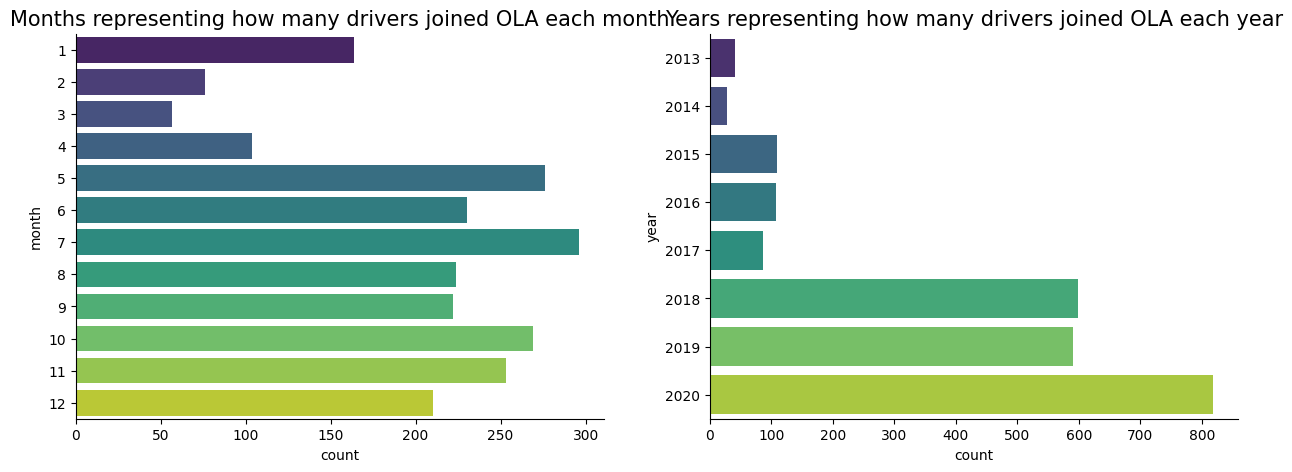

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.countplot(y=data1.month,palette='viridis')
plt.title('Months representing how many drivers joined OLA each month',fontname='Franklin Gothic Medium', fontsize=15)


ax = fig.add_subplot(1,2,2)
sns.countplot(y=data1.year,palette='viridis')
plt.title('Years representing how many drivers joined OLA each year',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

Observations :

- July received the maximum number of drivers in 8 years.
- February and March receives the least number of Drivers joining OLA.
- Joining of Drivers receives a boost of about 500% after 2017.

<ipython-input-43-aa1f30c9d9ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1.Age,palette='viridis',width=0.8)
<ipython-input-43-aa1f30c9d9ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=a,palette='viridis')


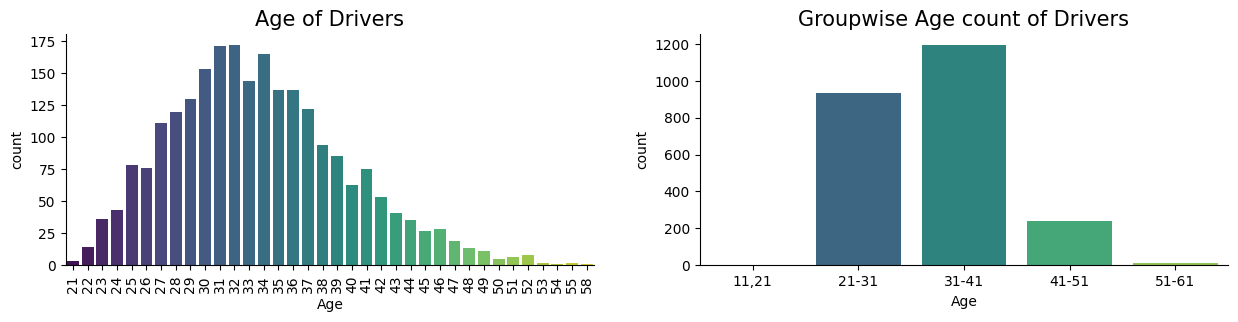

In [ ]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(121)
sns.countplot(x=data1.Age,palette='viridis',width=0.8)
plt.title('Age of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
a = pd.cut(data1.Age,bins=[11,21,31,41,51,61],labels=['11,21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a,palette='viridis')
plt.title('Groupwise Age count of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

<ipython-input-45-f8e76df0c2f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1.Cities,palette='viridis',width=0.6)
<ipython-input-45-f8e76df0c2f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1.Reportings,palette='viridis',width=0.6)


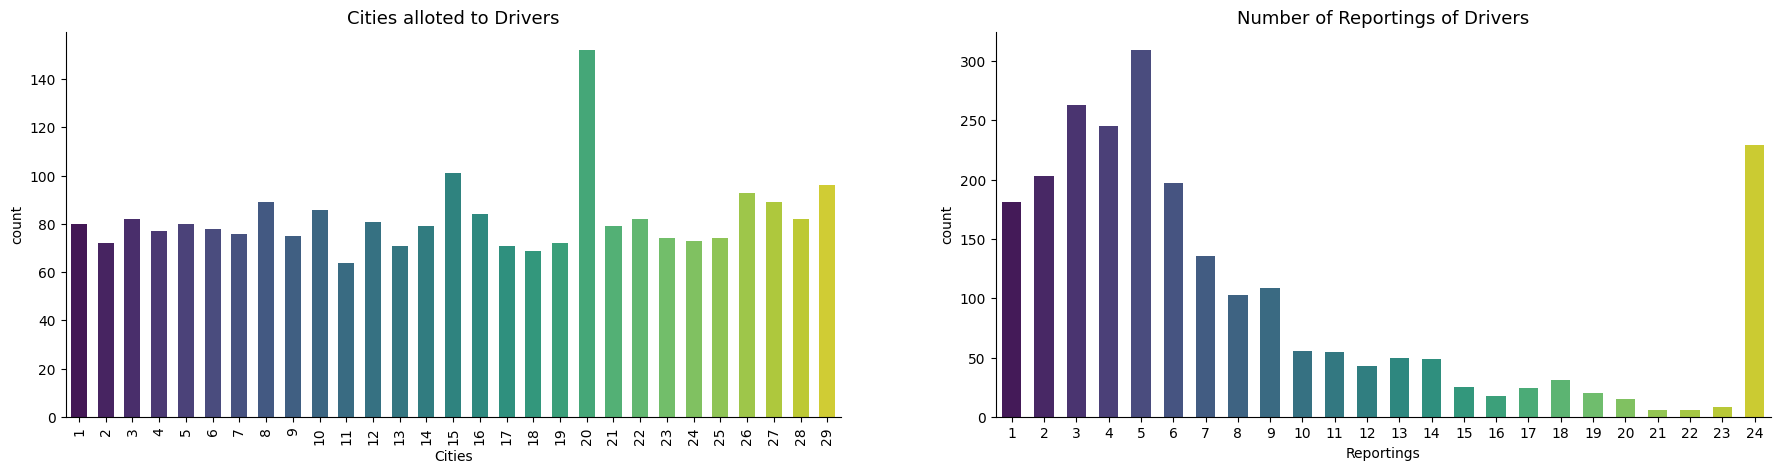

In [ ]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(121)
sns.countplot(x=data1.Cities,palette='viridis',width=0.6)
plt.title('Cities alloted to Drivers',fontname='Franklin Gothic Medium', fontsize=13)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(x=data1.Reportings,palette='viridis',width=0.6)
plt.title('Number of Reportings of Drivers',fontname='Franklin Gothic Medium', fontsize=13)

# ax = fig.add_subplot(133)
# sns.countplot(x=ola1.Education_Level,palette='viridis')
# plt.title('Educational Level of Drivers',fontname='Franklin Gothic Medium', fontsize=13)

sns.despine()
plt.show()

<ipython-input-46-153b944094fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1.Grade,palette='viridis')
<ipython-input-46-153b944094fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1['Joining Designation'],palette='viridis')
<ipython-input-46-153b944094fd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1.Education_Level,palette='viridis')
<ipython-input-46-153b944094fd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

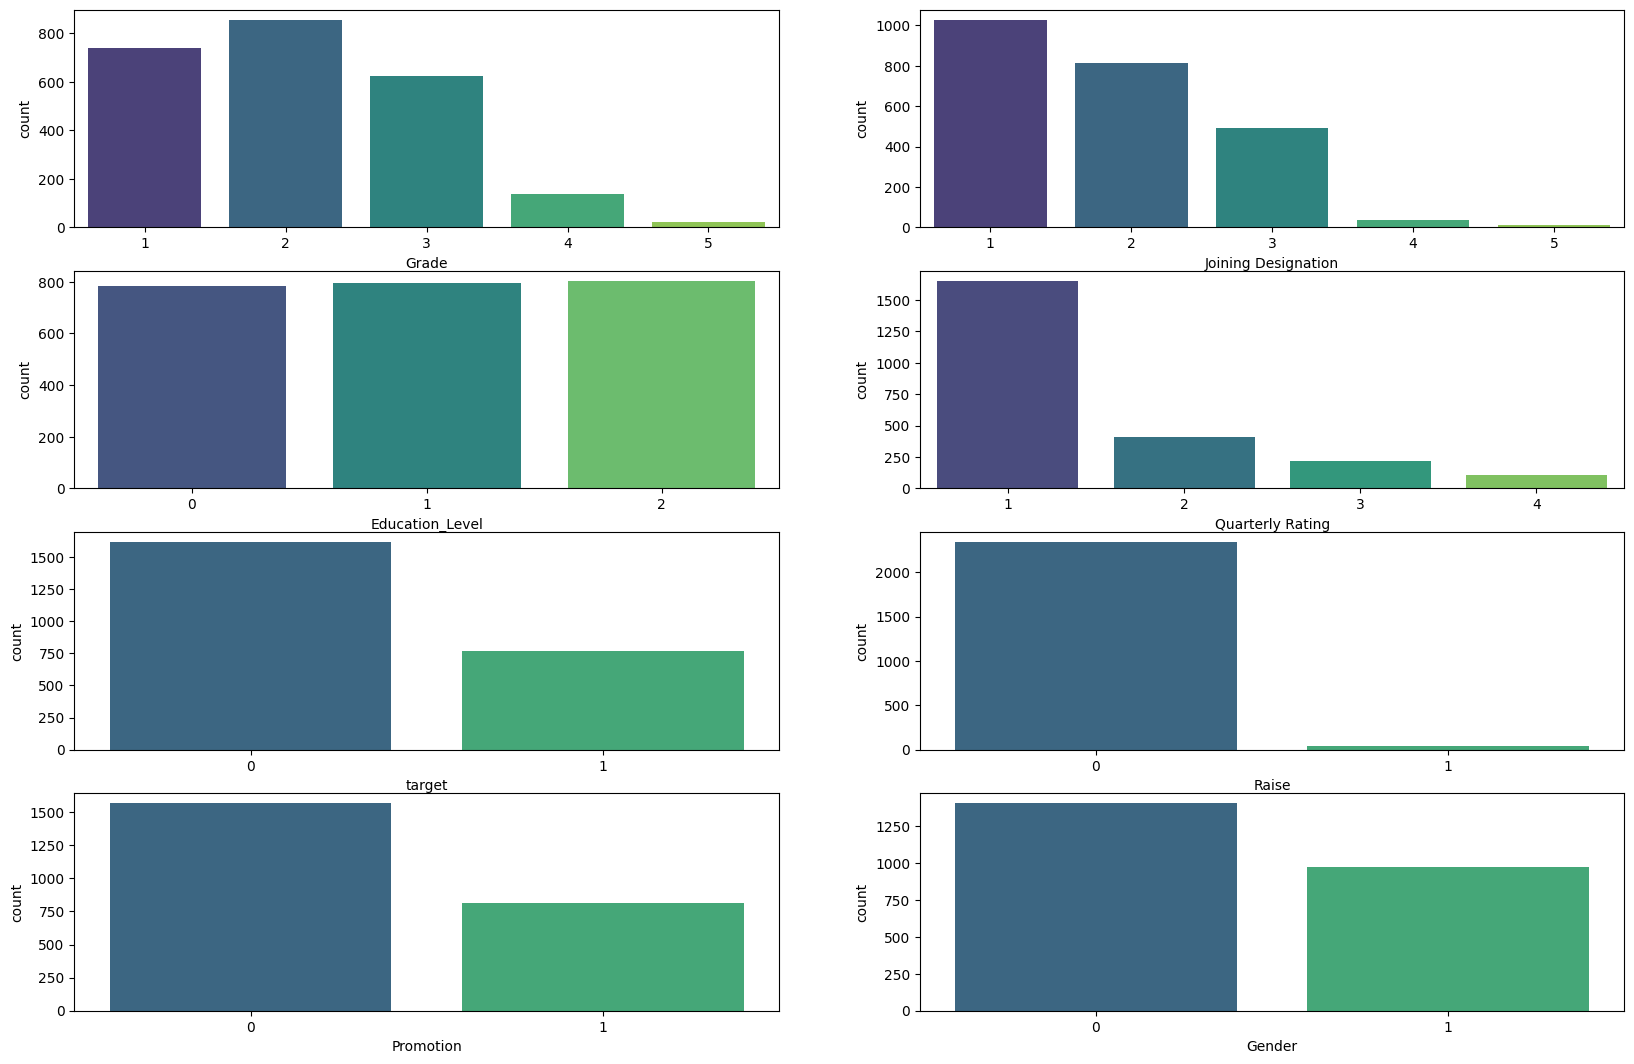

In [ ]:
plt.figure(figsize=(20,13))
plt.subplot(4,2,1)
sns.countplot(x=data1.Grade,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,2)
sns.countplot(x=data1['Joining Designation'],palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,3)
sns.countplot(x=data1.Education_Level,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)

plt.subplot(4,2,4)
sns.countplot(x=data1['Quarterly Rating'],palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,5)
sns.countplot(x=data1.target,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,6)
sns.countplot(x=data1.Raise,palette='viridis')

# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,7)
sns.countplot(x=data1.Promotion,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,8)
sns.countplot(x=data1.Gender,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.show()

Observations:

- Between 21 years(min age) to 58(max age) years of age, maximum number of drivers are 32 years o
meanwhile the age group between 31-41 years of age receives the maximum number of drivers.
- 58.9% of the Drivers are male.
- City C20 has been used by the most of the drivers.
- There are 3 Education levels and all of them alomst have the equal distribution of Drivers.
- Grade 2 has been received by most of the Drivers and then the count of grade keeps on falling.

<ipython-input-47-901e18d945da>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data1[i],color='teal')


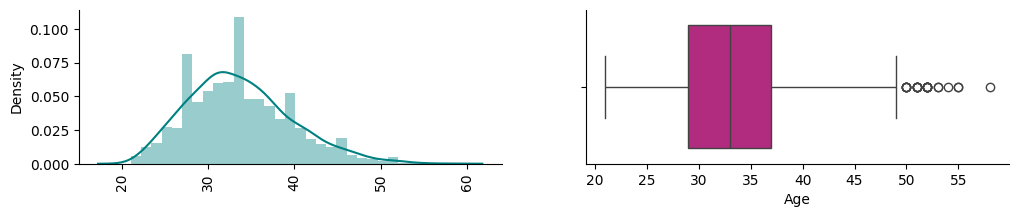

<ipython-input-47-901e18d945da>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data1[i],color='teal')


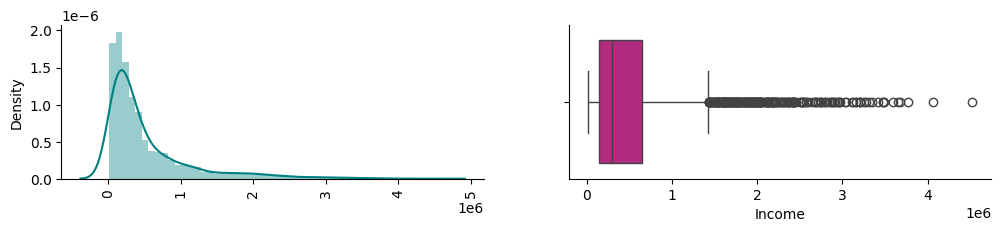

<ipython-input-47-901e18d945da>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data1[i],color='teal')


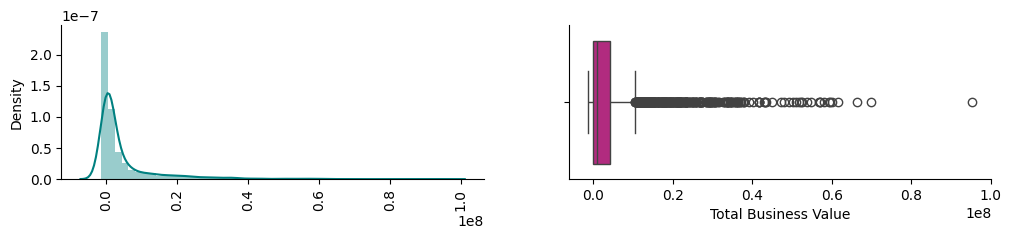

In [ ]:
a =data1[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,2))
    plt.subplot(121)
    sns.distplot(x=data1[i],color='teal')
    plt.title('')
    plt.xticks(rotation=90)

    plt.subplot(122)
    sns.boxplot(x=data1[i],color='mediumvioletred')
    plt.title('')
    sns.despine()
    plt.show()

Bivariate and multivariate

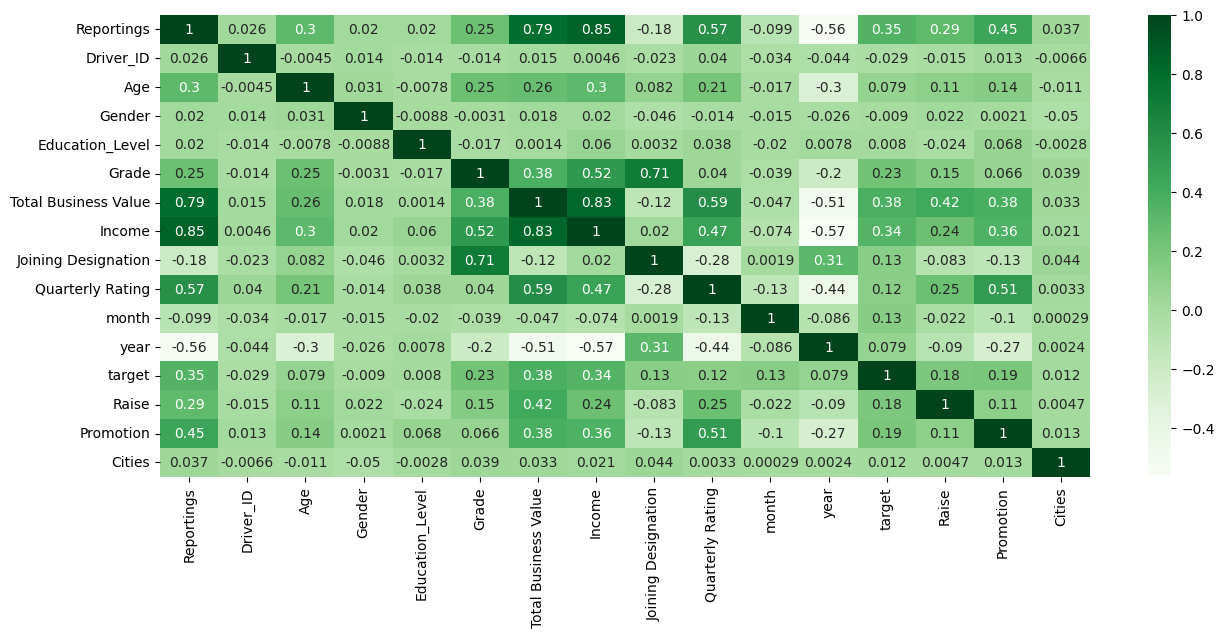

In [ ]:
corr = data1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

<ipython-input-51-077d8ba7694a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_months,x='month',y='Reportings',palette='viridis')
<ipython-input-51-077d8ba7694a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='Reportings', data=grouped_years,palette='viridis')
<ipython-input-51-077d8ba7694a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_gender['Gender'],y= grouped_gender['Reportings'],palette='viridis')


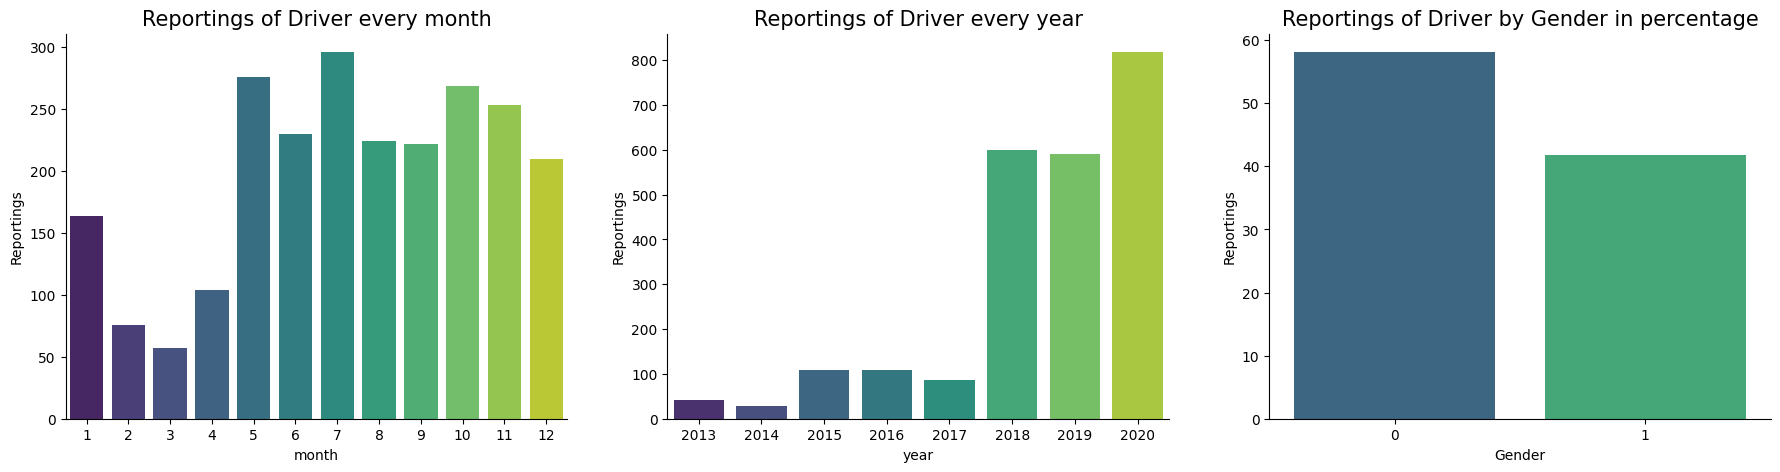

In [ ]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(1,3,1)
grouped_months = data1.groupby(['month'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_months,x='month',y='Reportings',palette='viridis')
plt.title('Reportings of Driver every month',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,3,2)
grouped_years = data1.groupby(['year'])['Reportings'].count().reset_index()
sns.barplot(x='year', y='Reportings', data=grouped_years,palette='viridis')
plt.title('Reportings of Driver every year',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,3,3)
grouped_gender = data1.groupby('Gender')['Reportings'].sum().reset_index()
grouped_gender['Reportings'] =(grouped_gender['Reportings']/sum(data1.Reportings)*100).round(2)
sns.barplot(x=grouped_gender['Gender'],y= grouped_gender['Reportings'],palette='viridis')
plt.title('Reportings of Driver by Gender in percentage',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
sns.despine()
plt.show()





In [ ]:
grouped_gender

,Gender,Reportings
0,0,58.12
1,1,41.88


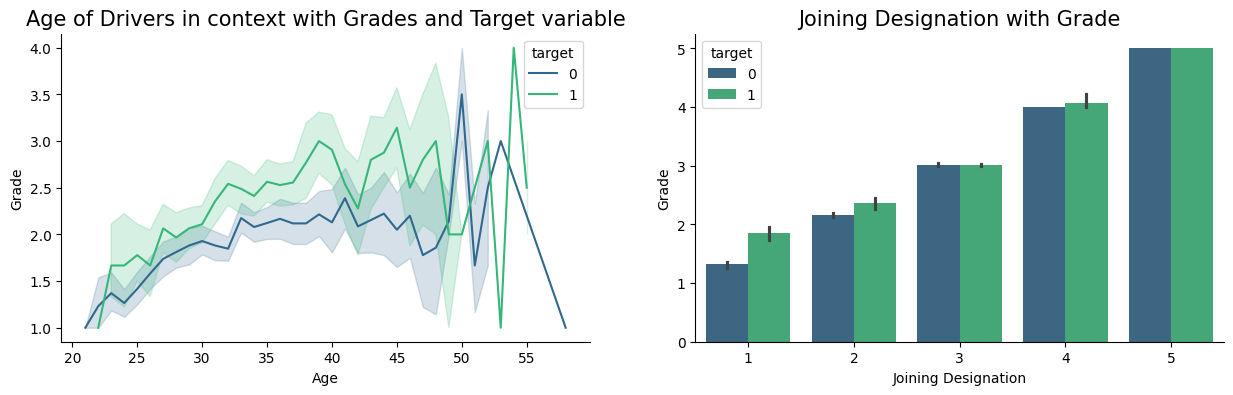

In [ ]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
sns.lineplot(x=data1.Age,y=data1.Grade,hue=data1.target,palette='viridis')
plt.title('Age of Drivers in context with Grades and Target variable',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,2,2)
sns.barplot(data=data1, x="Joining Designation", y="Grade",palette='viridis',hue='target')
plt.title('Joining Designation with Grade',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

<ipython-input-55-5b9d84299696>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = grouped_rating,y='Reportings',x='Quarterly Rating',palette='viridis')


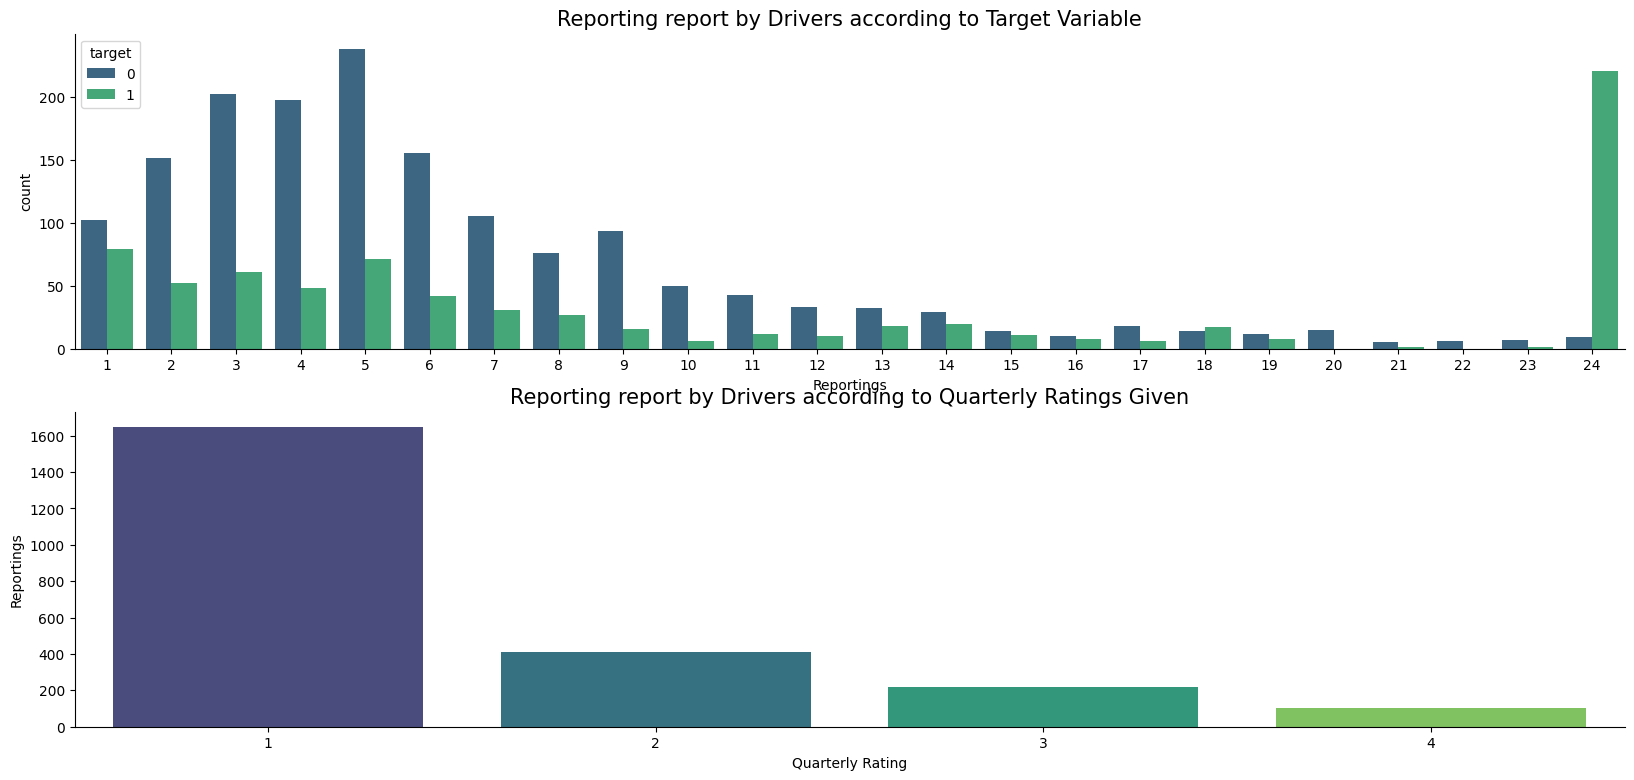

In [ ]:
plt.figure(figsize=(20,9))
plt.subplot(2,1,1)
sns.countplot(x=data1['Reportings'],hue=data1.target,palette='viridis')
plt.title('Reporting report by Drivers according to Target Variable',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(2,1,2)
grouped_rating = data1.groupby('Quarterly Rating')['Reportings'].count().reset_index()
sns.barplot(data = grouped_rating,y='Reportings',x='Quarterly Rating',palette='viridis')
plt.title('Reporting report by Drivers according to Quarterly Ratings Given',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

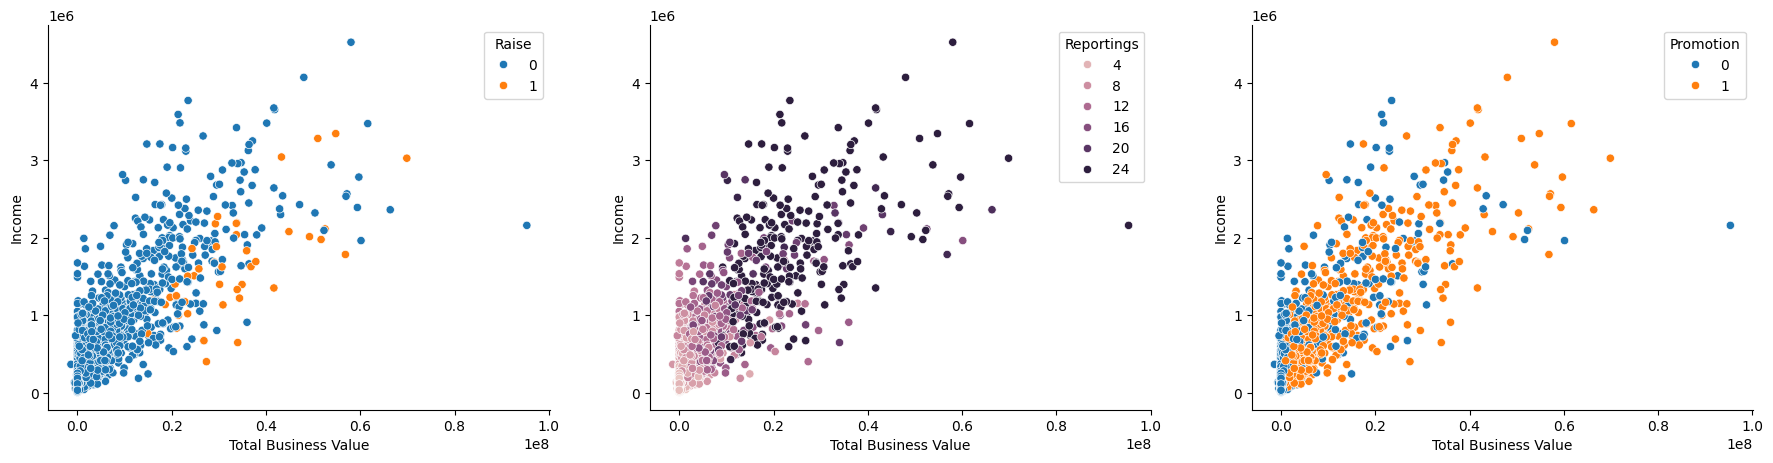

In [ ]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=data1['Total Business Value'],y=data1.Income,hue=data1.Raise)
plt.subplot(1,3,2)
sns.scatterplot(x=data1['Total Business Value'],y=data1.Income,hue=data1.Reportings)
plt.subplot(1,3,3)
sns.scatterplot(x=data1['Total Business Value'],y=data1.Income,hue=data1.Promotion)
sns.despine()
plt.show()

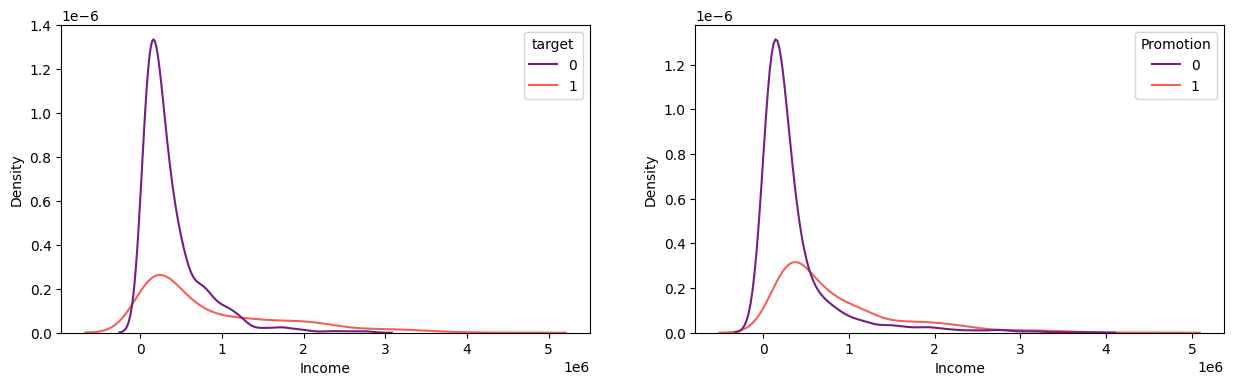

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(x=data1.Income,hue=data1['target'],palette='magma')
plt.subplot(1,2,2)
sns.kdeplot(x=data1.Income,hue=data1['Promotion'],palette='magma')
plt.show()

OUTLIER TREATMENT

In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


In [ ]:
len(data1[data1['Total Business Value'] < 1])

729

* As we can notice Total Business Value column has some values in negative.

* We consider them as outlier which will affect the results of the our machine learning model.

* Considering the parts of datasets that has Total Business Value > 1.

* There are exactly 729 Driver having Total Business Value that less than 1.

In [ ]:
ola= data1[data1['Total Business Value'] > 1]

<ipython-input-62-3f4802264cb0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ola[i],color='red')


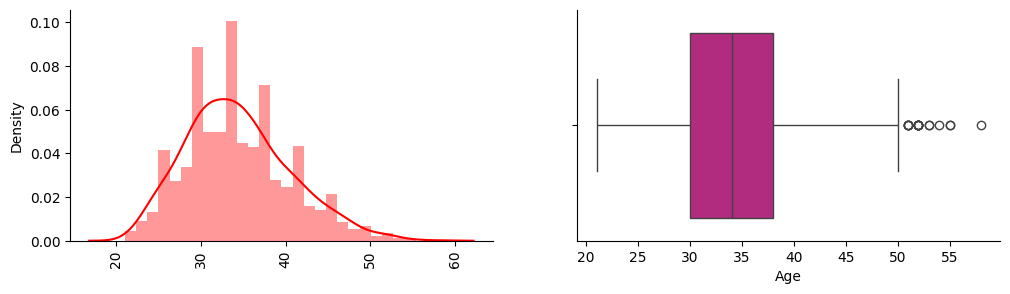

<ipython-input-62-3f4802264cb0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ola[i],color='red')


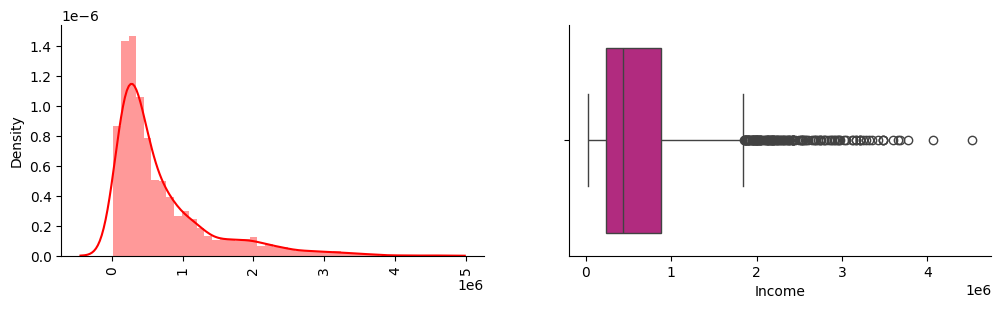

<ipython-input-62-3f4802264cb0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ola[i],color='red')


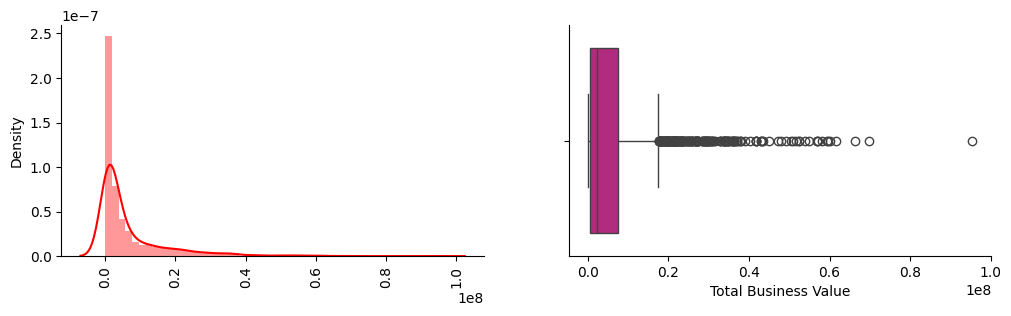

In [ ]:
a =ola[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    sns.distplot(x=ola[i],color='red')
    plt.xticks(rotation=90)


#     plt.figure(figsize=(9,5))
    plt.subplot(122)
    sns.boxplot(x=ola[i],color='mediumvioletred')
    sns.despine()
    plt.show()

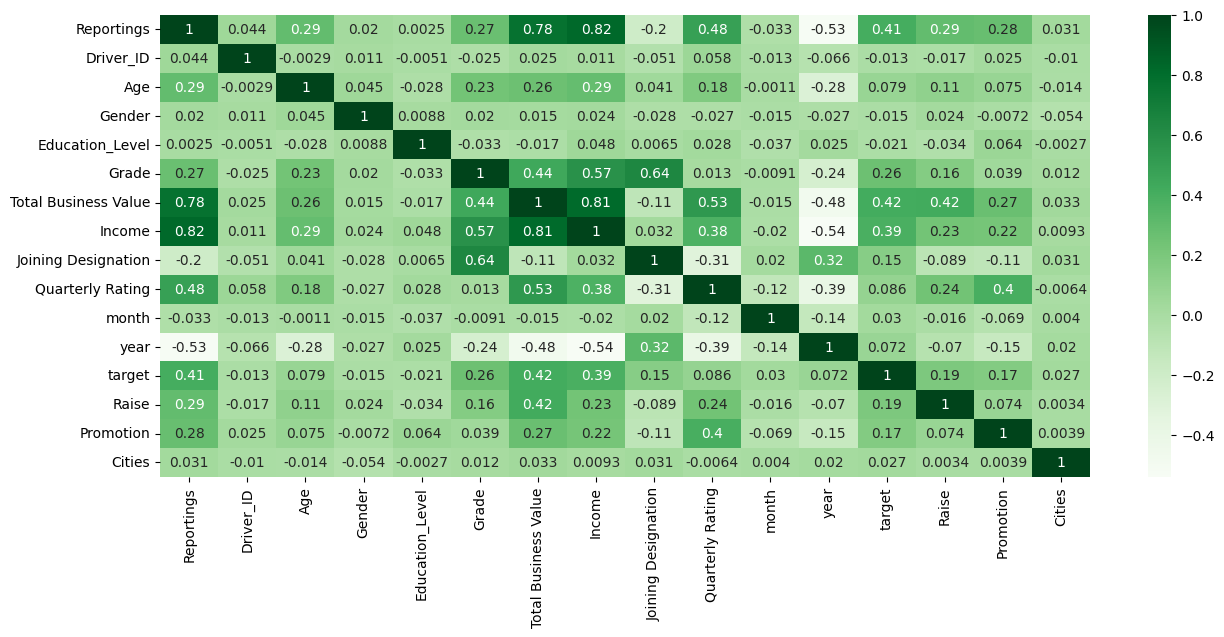

In [ ]:
corr = ola.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

In [ ]:
ola.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,1652.0,1.026998e+01,6.967589e+00,1.0,5.0,8.0,14.0,24.0
Driver_ID,1652.0,1.390315e+03,8.082919e+02,1.0,679.5,1385.0,2097.0,2788.0
Age,1652.0,3.432385e+01,6.190776e+00,21.0,30.0,34.0,38.0,58.0
Gender,1652.0,4.158596e-01,4.930188e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,1652.0,1.030872e+00,8.093284e-01,0.0,0.0,1.0,2.0,2.0
Grade,1652.0,2.144068e+00,9.719606e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,1652.0,6.613094e+06,1.032794e+07,19580.0,663022.5,2242080.0,7418392.5,95331060.0
Income,1652.0,6.864932e+05,6.814522e+05,20886.0,236652.5,428960.0,877151.0,4522032.0
Joining Designation,1652.0,1.759685e+00,8.395129e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,1652.0,1.700363e+00,9.237035e-01,1.0,1.0,1.0,2.0,4.0


ENSEMBLE LEARNING:-

1. **Data Prepration:-**

The Trade-Off In general while choosing a model, we might choose to look at precision and recall scores and choose while keeping the follwing trade-off on mind : -

If we prioritize precision, we are going to reduce our false positives. This may be useful if our targeted retention strategies prove to be expensive. We don’t want to spend unnecessarily on somebody who is not even going to leave in the first place. Also, it might lead to uncomfortable situation for the employee themselves if they are put in a situation where it is assumed that they are going to be let go/ going to leave. • If we prioritize recall, we are going to reduce our false negatives. This is useful since usually the cost of hiring a new person is higher than retaining n experienced person. So, by reducing false negatives, we would be able to better identify those who are actually going to leave and try to retain them by appropriate measures (competitve remuneration, engagement program, etc).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [ ]:
X = ola.drop('target',axis=1)
y = ola['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, Y, title):
    train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,X,Y,return_times=True)
    fig, axes = plt.subplots(1, 1, figsize = (15, 5))
    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plotting learning curve

    axes.grid()
    axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
    )
    axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
    )
    axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    plt.show()

In [ ]:
X.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,Raise,Promotion,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,23
2,5,4,43,0,2,2,350000,328015,2,1,12,2019,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,1,2019,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,7,2020,0,1,11
7,6,12,35,0,2,1,2607180,168696,1,4,6,2019,0,1,23


In [ ]:
ss= StandardScaler()
ss.fit_transform(X_train)


array([[-0.61446611, -1.09640018,  1.70794584, ..., -0.16737851,
         1.023749  , -0.04979913],
       [ 1.93718866, -1.32951199,  1.54780698, ..., -0.16737851,
        -0.97680193, -0.5247786 ],
       [-0.18919032, -1.0914666 ,  0.26669606, ..., -0.16737851,
         1.023749  ,  1.25639439],
       ...,
       [-0.75622471,  0.03585718, -1.49483144, ..., -0.16737851,
        -0.97680193, -0.88101319],
       [ 0.51960268,  1.32105562, -1.33469258, ..., -0.16737851,
         1.023749  , -1.59348238],
       [-0.33094892,  0.60815284, -0.69413712, ..., -0.16737851,
        -0.97680193, -0.28728886]])

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: [0.73 0.76 0.75 0.75 0.77]
Mean: 0.7548512313466995
Decision Tree: [0.879 0.894 0.888 0.867 0.885]
Mean: 0.8825615673349813
RandomForestClassifier(): [0.92 0.93 0.91 0.92 0.92]
Mean: 0.9194836583356221
GradientBoostingClassifier: [0.931 0.937 0.927 0.912 0.909]
Mean: 0.9231108669779365
XGBoostClassifier: [0.73 0.76 0.75 0.75 0.77]
Mean: 0.9243138331960085


Random Forest Classifier

In [ ]:
rf_clf1 = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

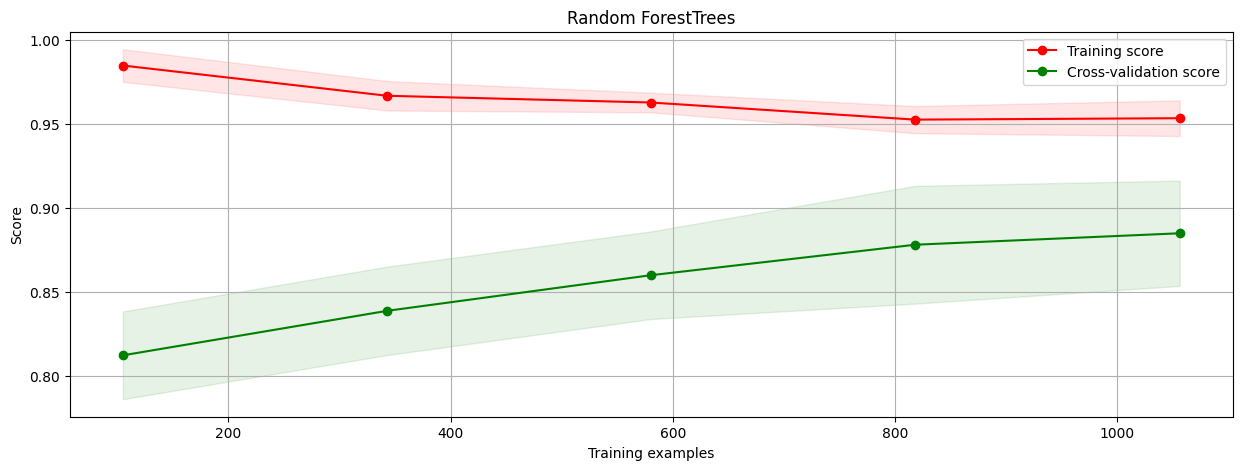

In [ ]:
plot_learning_curve(rf_clf1, X_train, y_train, "Random ForestTrees")

In [ ]:
y_pred = rf_clf1.predict(X_test)
proba = rf_clf1.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf1.score(X_train, y_train))
print("Test data accuracy:",rf_clf1.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Metrix')
print(confusion_matrix(y_test, y_pred))


Train data accuracy: 0.93111279333838
Test data accuracy: 0.8640483383685801
Accuracy of the model: 0.8640483383685801
ROC-AUC score test dataset:  0.9337891538101917
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       207
           1       0.86      0.77      0.81       124

    accuracy                           0.86       331
   macro avg       0.86      0.84      0.85       331
weighted avg       0.86      0.86      0.86       331

----------------------------------------------------------------------
Confusion Metrix
[[191  16]
 [ 29  95]]


In [ ]:
rf_clf_imp1 = rf_clf1.feature_importances_

XG Boosting Classifier

In [ ]:
gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train, y_train)
y_pred = gbc1.predict(X_test)
proba =gbc1.predict_proba(X_test)[:, 1]

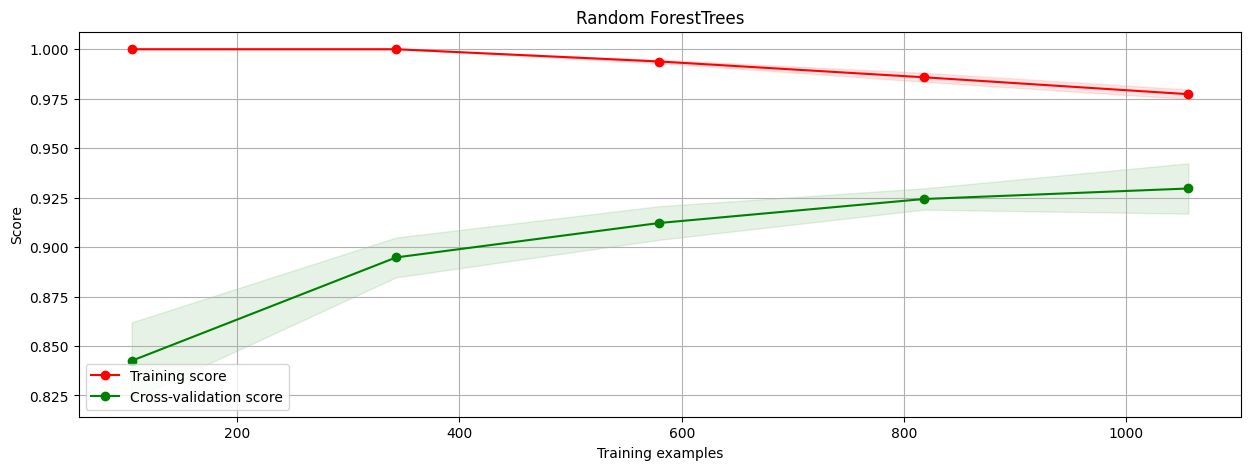

In [ ]:
plot_learning_curve(gbc1, X_train, y_train, "Random ForestTrees")

In [ ]:
gbc_clf_imp1 = gbc1.feature_importances_

In [ ]:
print('Train Score : ', gbc1.score(X_train, y_train))
print('Test Score : ', gbc1.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm2 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.9704769114307343
Test Score :  0.918429003021148
Accuracy Score :  0.918429003021148
ROC-AUC score test dataset:  0.9589956365903071
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       207
           1       0.89      0.90      0.89       124

    accuracy                           0.92       331
   macro avg       0.91      0.91      0.91       331
weighted avg       0.92      0.92      0.92       331

------------------------------------------------------------
Confusion Matrix
[[193  14]
 [ 13 111]]
------------------------------------------------------------


CLASS IMBALANCE TREATMENT

<ipython-input-81-7a0efb30c94d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train,palette='Set2')


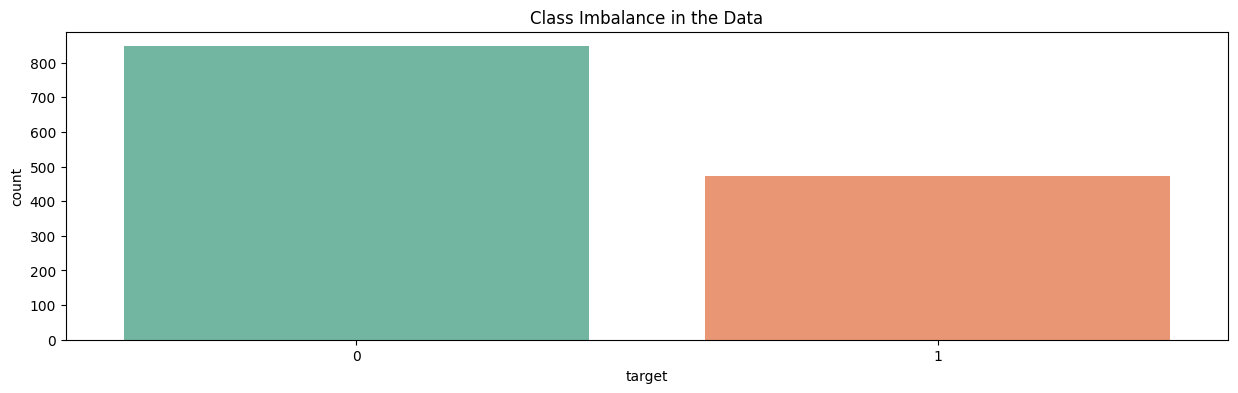

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x=y_train,palette='Set2')
plt.title('Class Imbalance in the Data')
plt.show()

In [ ]:
(y_train.value_counts()*100)/len(y_train)

,count
target,
0,64.118092
1,35.881908


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smot = SMOTE(random_state=42)
X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train.ravel())

<ipython-input-84-bf3e46e97dde>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train.ravel())


In [ ]:
X_train_smot.shape,y_train_smot.shape

((1694, 15), (1694,))

In [ ]:
X_test.shape,y_test.shape

((331, 15), (331,))

In [ ]:
from collections import Counter
c = Counter(y_train_smot)
print(c)

Counter({0: 847, 1: 847})


Random Forest Classifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier()

In [ ]:
clf = RandomForestClassifier(criterion='gini',max_depth=8,
                           max_features='sqrt',n_estimators= 19)
clf.fit(X_train_smot,y_train_smot)


RandomForestClassifier(max_depth=8, n_estimators=19)

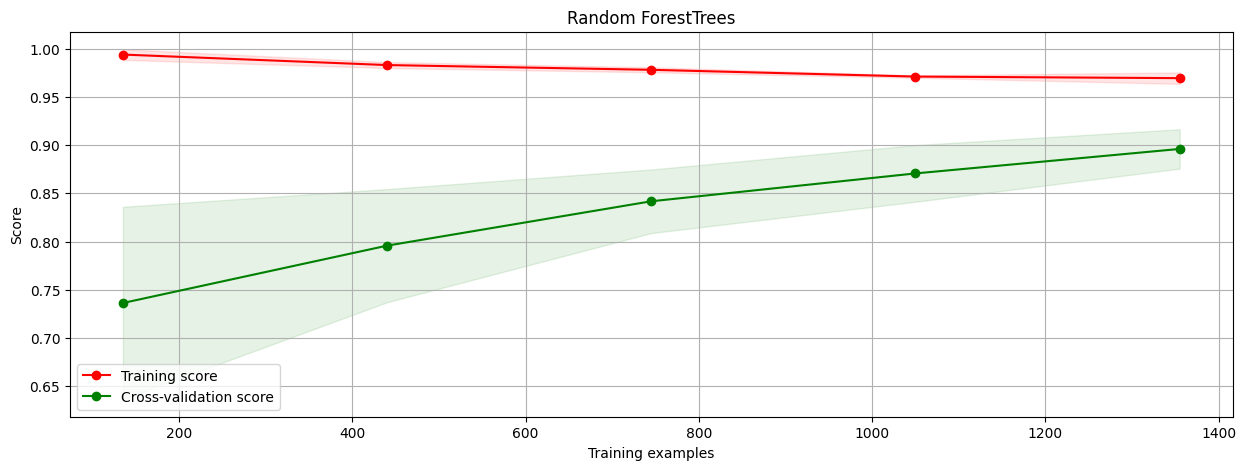

In [ ]:
plot_learning_curve(clf, X_train_smot, y_train_smot, "Random ForestTrees")

In [ ]:
y_pred = clf.predict(X_test)
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
print('Confusion Metrix')
cm3 = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       207
           1       0.83      0.93      0.88       124

    accuracy                           0.90       331
   macro avg       0.89      0.91      0.90       331
weighted avg       0.91      0.90      0.90       331

----------------------------------------------------------------------
Confusion Metrix
[[184  23]
 [  9 115]]


In [ ]:
rf_clf_imp2= clf.feature_importances_

Gradient Boosting

In [ ]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train_smot, y_train_smot)
y_pred1 = gbc2.predict(X_test)
gbc_clf_imp2 = gbc2.feature_importances_
print('-'*60)
print(classification_report(y_test, y_pred1))
print('-'*60)
cm4 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix')
print(cm4)
print('-'*60)

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       207
           1       0.84      0.90      0.87       124

    accuracy                           0.90       331
   macro avg       0.89      0.90      0.90       331
weighted avg       0.90      0.90      0.90       331

------------------------------------------------------------
Confusion Matrix
[[186  21]
 [ 12 112]]
------------------------------------------------------------


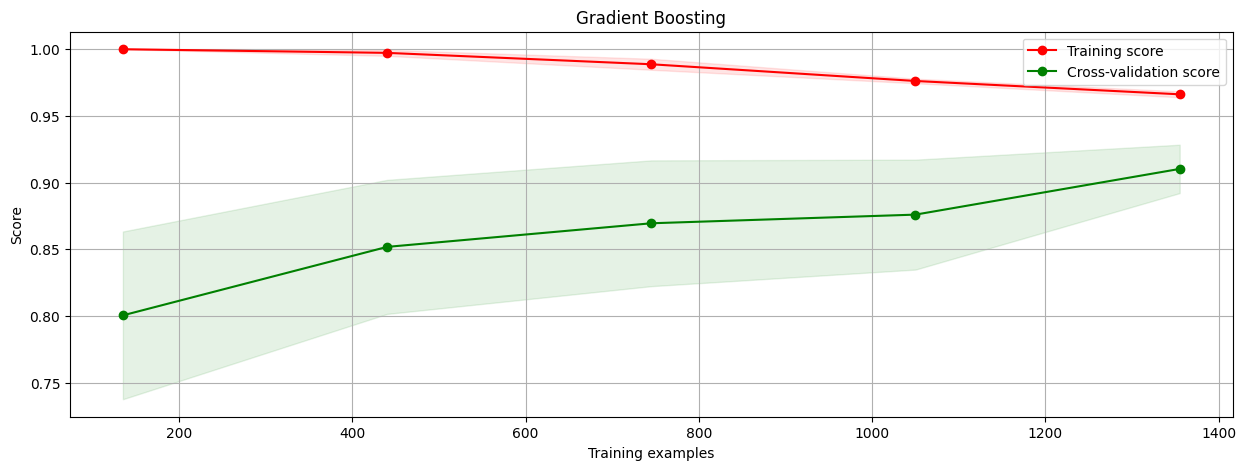

In [ ]:
plot_learning_curve(gbc2, X_train_smot, y_train_smot, "Gradient Boosting")

In [ ]:
data1 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp1,
                    'XGBClassifier':gbc_clf_imp1})

In [ ]:
data2 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp2,
                    'XGBClassifier':gbc_clf_imp2})

In [ ]:
data1

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.213747,0.391419
1,Driver_ID,0.034550,0.008489
2,Age,0.028167,0.005785
3,Gender,0.004999,0.000528
4,Education_Level,0.007317,0.000079
5,Grade,0.033851,0.001784
6,Total Business Value,0.223573,0.099191
7,Income,0.096796,0.023946
8,Joining Designation,0.039729,0.003448
9,Quarterly Rating,0.031877,0.008479


In [ ]:
data2

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.233561,0.256746
1,Driver_ID,0.026112,0.007620
2,Age,0.030813,0.006710
3,Gender,0.007007,0.006807
4,Education_Level,0.014143,0.003721
5,Grade,0.015394,0.005769
6,Total Business Value,0.201238,0.196760
7,Income,0.082703,0.024644
8,Joining Designation,0.021210,0.002467
9,Quarterly Rating,0.038727,0.026927


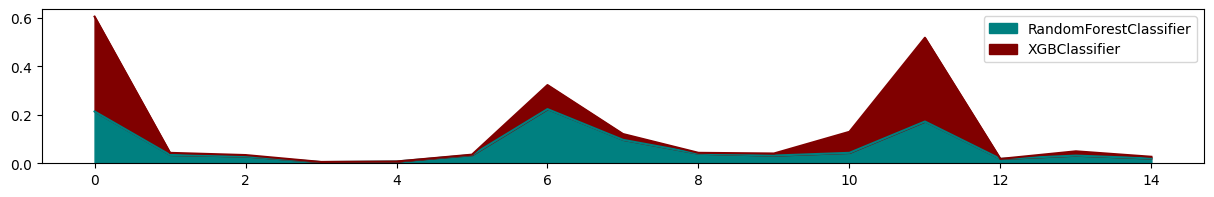

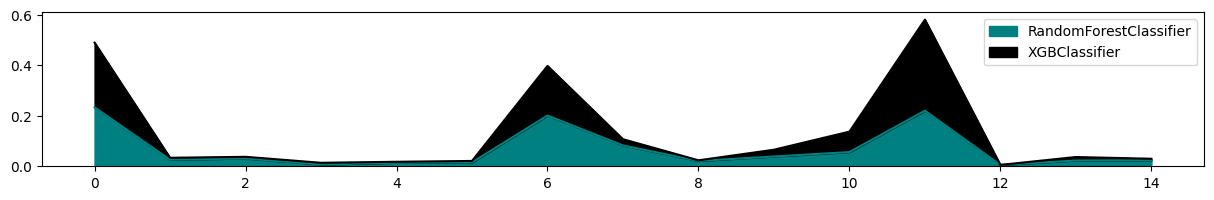

In [ ]:
data1.plot(kind="area", figsize = (15,2),color=['teal','maroon'])

data2.plot(kind="area", figsize = (15,2),color=['teal','black'])

plt.show()

In [ ]:
# calculating precision, reall and f1_score for every
tp1,fp1,fn1,tn1 =cm1[0][0],cm1[0][1],cm1[1][0],cm1[1][1]
tp2,fp2,fn2,tn2 =cm2[0][0],cm2[0][1],cm2[1][0],cm2[1][1]
tp3,fp3,fn3,tn3 =cm3[0][0],cm3[0][1],cm3[1][0],cm3[1][1]
tp4,fp4,fn4,tn4 =cm4[0][0],cm4[0][1],cm4[1][0],cm4[1][1]
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)
f1_1 = (2*precision1*recall1)/(precision1+recall1)
f1_2 = (2*precision2*recall2)/(precision2+recall2)
f1_3 = (2*precision3*recall3)/(precision3+recall3)
f1_4 =(2*precision4*recall4)/(precision4+recall4)

In [ ]:
df = pd.DataFrame({'Model':['RandomForest','GradientBoosting','RandomForest','GradientBoosting'],
                  'Class':['imbalanced','imbalanced','balanced','balanced'],
                  'True_pos':[tp1,tp2,tp3,tp4],
                  'Fal_pos':[fp1,fp2,fp3,fp4],
                  'Fal_neg':[fn1,fn2,fn3,fn4],
                  'True_neg':[tn1,tn2,tn3,tn4],
                  'F1_score%':[f1_1*100,f1_2*100,f1_3*100,f1_4*100],
                  'Precision%':[precision1*100,precision2*100,precision3*100,precision4*100],
                  'Recall%':[recall1*100,recall2*100,recall3*100,recall4*100]})

In [ ]:
df

,Model,Class,True_pos,Fal_pos,Fal_neg,True_neg,F1_score%,Precision%,Recall%
0,RandomForest,imbalanced,191,16,29,95,89.461358,92.270531,86.818182
1,GradientBoosting,imbalanced,193,14,13,111,93.462470,93.236715,93.689320
2,RandomForest,balanced,184,23,9,115,92.000000,88.888889,95.336788
3,GradientBoosting,balanced,186,21,12,112,91.851852,89.855072,93.939394


<ipython-input-103-a04a1f9ff36e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Class,y=df.True_pos,palette='viridis')
<ipython-input-103-a04a1f9ff36e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Class,y=df.True_neg,palette='viridis')
<ipython-input-103-a04a1f9ff36e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
<ipython-input-103-a04a1f9ff36e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

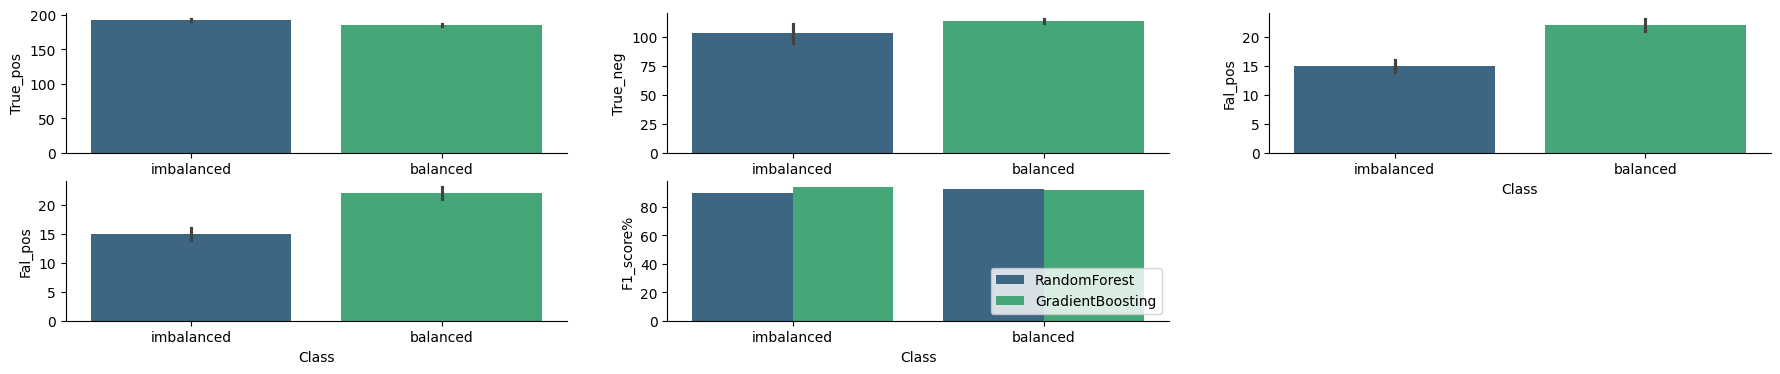

In [ ]:
plt.figure(figsize=(22,4))
plt.subplot(2,3,1)
sns.barplot(x=df.Class,y=df.True_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,2)
sns.barplot(x=df.Class,y=df.True_neg,palette='viridis')
# plt.show()
plt.subplot(2,3,3)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,4)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
plt.subplot(2,3,5)
sns.barplot(x=df.Class,y=df['F1_score%'],palette='viridis',hue=df.Model)
plt.legend(loc='lower right')
sns.despine()
plt.show()

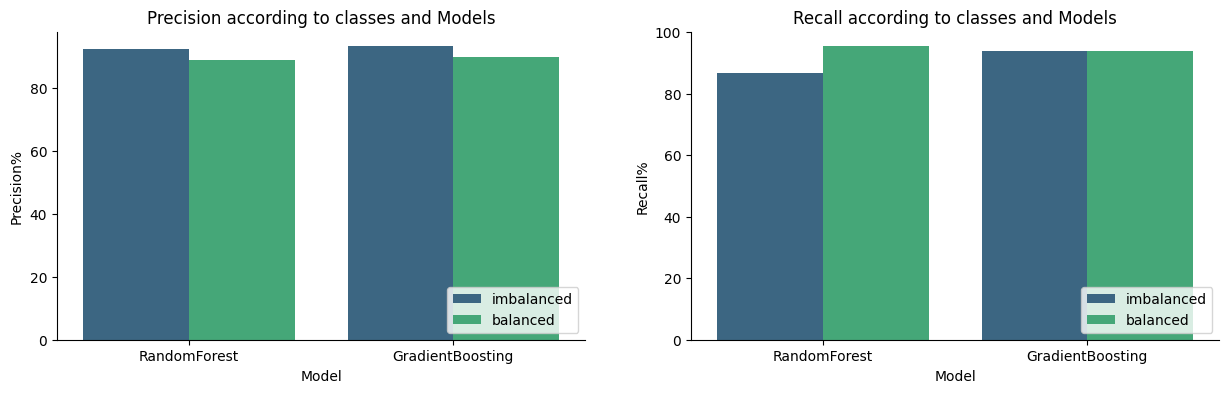

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x=df.Model,y=df['Precision%'],hue=df.Class,palette='viridis')
plt.title('Precision according to classes and Models')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
sns.barplot(x=df.Model,y=df['Recall%'],hue=df.Class,palette='viridis')
plt.title('Recall according to classes and Models')
plt.legend(loc='lower right')
sns.despine()
plt.show()

INSIGHTS

* So we see that there are 57% male employees and 43% female employees.
* The percentages of employees with different education levels are almost same for level 1 & 2.
* 97.3% of the employees who did not get a raise.
* Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.

* Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
* Income decreses with increase in Destination as about 4% of the employees hold higher designations.
* The median of the Income for employees having higher Grades is greater.
* Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
* Joining Designation Increases with increase in Grade.
* Top reporting days is 24 days.
* About 55% of the reportings of the employees has got Quarlerly Rating 1.
* Number of reportings increases with increase in Income as well as Total Business Value.
* Recall increased after treatment of data imbalance and is performing bettee in Gradient Boosting.
* Precision dropped after treatment of data imbalance and is performing better in Random Forest.
* F1_score incresed after the treatment of imabalanced data and in Gradient Boosting.